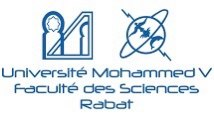

In [60]:
from IPython.display import Image
Image("fsrr.jpg", width = 600, height = 300)

# Projet Twitter sentiments analysis 
     by Abraca-data team
     
                           Réalisé par : Ayoub Meskine & Brahim Zaoug
                           Encadré par : Mr Abdelhak Mahmoudi

# Résumé
L'analyse des sentiments est une technologie d'analyse automatique des discours, écrits ou parlés dans le but consiste à extraire des informations subjectives comme les jugements, des évaluations ou des émotions pour détecter la polarité d'une opinion.
L’importance de l'analyse des sentiments, est présente dans plusieurs domaines à savoir politique marketing, gestion de la réputation.
Dans ce Project. Notre objectif consiste à réaliser un models classifieur capable à faire des prédiction des sentiments en le l'appliquant sur le cas de Twitter en adoptant une approche pour l'apprentissage automatique.
Pour ce faire nous avons implémenté la méthode probabiliste Naïve Bayes et Logistic Regression sur Tweeter en utilisant la bibliothèque tweepy de Python. Nous avons considéré le modèle de représentation des données sémantique avec la pondération TF-IDF(Terme Frequency - Inverse Document Frequency).

# Import Libraries

In [31]:
from sklearn import metrics
import re
import pickle
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import load_files
import tweepy
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
import numpy as np
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/ayoub/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Import dataset

In [3]:
reviews = load_files('tokens/')

x,y = reviews.data,reviews.target

# Enregistrer les resultat dans un ficher

In [4]:
 with open('x.pickle','wb') as f:
    pickle.dump(x,f)

with open('y.pickle','wb') as f:
    pickle.dump(y,f)
    
    

# Unpicking the data 

In [5]:
with open('x.pickle','rb') as f:
    x=pickle.load(f)
    
with open('y.pickle','rb') as f:
    y=pickle.load(f)


# Creating corpus

In [6]:
corpus = []
for i in range(0,len(x)):
    review = re.sub(r'\W',' ',str(x[i]))
    review = review.lower()
    review = re.sub(r'\s+[a-z]\s+',' ',review)
    review = re.sub(r'^[a-z]\s+',' ',review)
    review=re.sub(r"\d"," ",review)
    corpus.append(review)
    

# Create the Tf_idf model

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=26400,min_df=3,max_df=0.6,stop_words=stopwords.words('english'))
x=vectorizer.fit_transform(corpus).toarray()


# Split the data to train and test sets

In [8]:
from sklearn.model_selection import train_test_split
text_train,text_test,sent_train,sent_test=train_test_split(x,y,test_size=0.2,random_state=0)


# Training the models Naîve Bayes and Logistic Regression

### Fit the logistic regression algorithme

In [9]:
from sklearn.linear_model import LogisticRegression
classifierL =LogisticRegression()
classifierL.fit(text_train,sent_train)

MultinomialNB()

### Fit the naîve bayes algorithme

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifierB = MultinomialNB()
classifierB.fit(text_train,sent_train)

# Test performence
#### Comparaison entre Logistic Regression et Naîve Bayes en utilisonts la matrice de confusion et fscore recall occurity pressision 

In [10]:
sent_predB = classifierB.predict(text_test)
sent_predL= classifierL.predict(text_test)

from sklearn.metrics import confusion_matrix
cmB=confusion_matrix(sent_test,sent_predB)
cmL=confusion_matrix(sent_test,sent_predL)
print("table de confusion NaïveBayes\n",cmB)
print("\ntable de confusion Logistique Régression\n",cmL)
 
VPB=cmB[0,0]
FPB=cmB[0,1]
FNB=cmB[1,0]
VNB=cmB[1,1]


VPL=cmL[0,0]
FPL=cmL[0,1]
FNL=cmL[1,0]
VNL=cmL[1,1]


PrecisionB=VPB/(VPB+FPB)
RappelB=VPB/(VPB+FNB)
F1_mesureB=2*PrecisionB*RappelB/(PrecisionB+RappelB)


PrecisionL=VPL/(VPL+FPL)
RappelL=VPB/(VPL+FNL)
F1_mesureL=2*PrecisionL*RappelL/(PrecisionL+RappelL)


print("precession Naïve Bayes: ",PrecisionB)
print("pricession Logistique Regression: ",PrecisionL)
print("Rappel de Naïve Bayes: ",RappelB)
print("Rappel de Logistique Regression: ",RappelL)
print("F1_mesure de Naïve Bayes: ",F1_mesureB)
print("F1_mesure de Logistique Regression: ",F1_mesureL)



table de confusion NaïveBayes
 [[2311  331]
 [ 350 2288]]

table de confusion Logistique Régression
 [[2314  328]
 [ 241 2397]]
precession Naïve Bayes:  0.8747161241483724
pricession Logistique Regression:  0.8758516275548827
Rappel de Naïve Bayes:  0.8684704998121007
Rappel de Logistique Regression:  0.9045009784735812
F1_mesure de Naïve Bayes:  0.8715821233264189
F1_mesure de Logistique Regression:  0.8899457910063062


# Pickling the classifiers Logistic and Bayes and victorizer

In [11]:
with open('classifierB.pickle','wb') as f:
    pickle.dump(classifierB,f)
   
#Pickling the classifire Logistic 
with open('classifierL.pickle','wb') as f:
    pickle.dump(classifierL,f)
    
#pickling the vectorizer
with open('tfidfmodel.pickle','wb') as f:
        pickle.dump(vectorizer,f)
     


# Importer et utilisée le modèle classifieur
### unpickling the classifire and vectorizer

In [12]:

with open('classifierL.pickle','rb') as f:
    clfL=pickle.load(f)
    
with open('classifierB.pickle','rb') as f:
        clfB=pickle.load(f)
        
with open('tfidfmodel.pickle','rb') as f:
    tfidf=pickle.load(f)
    

# Test du modèle

In [22]:

test =["i liked my self"]
test=tfidf.transform(test).toarray()
sentB = clfB.predict(test)
sentL = clfL.predict(test)
print("<<phrase polarity en utilisant bayes>>\n")
if sentB[0] == 1:
            print("la phrase que vous avez entrée est positive")
else:
       print("la phrase que vous avez entrée est négative\n")

print("\n<<phrase polarity en utilisant Logistque Regression>>\n")
if sentL[0] == 1:
            print("la phrase que vous avez entrée est positive\n")
else:
       print("la phrase que vous avez entrée est négative\n")

       
       

<<phrase polarity en utilisant bayes>>

la phrase que vous avez entrée est positive

<<phrase polarity en utilisant Logistque Regression>>

la phrase que vous avez entrée est positive



# Application du modèle classifieur sur les données extrer d'après twetter   

# Initialising the keys

In [32]:
consumer_key='A7zEJHYcutt3U37c4JEEcSXtA'
consumer_secret='ZCseQI6Tvo604hLNt2nXwpTLKqtx8bQwXgpbkeAVnodyoanORw'
access_token='1107606361901289472-1g12pcv7I03dzzPAvqVBNqtUidDItP'
access_secret='OMEha5VviMEmf8mBSDNhGjh17Z6qXtd8Ea6sCPtdboLOl'
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

# Extraction des tweets

In [45]:
args = ['corona virus']
api = tweepy.API(auth,timeout=10)

list_tweets = []

query = args[0]

if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='re').items(100):
        list_tweets.append(status.text)


# Nettoyage des tweets et prediction des sentiments

In [46]:

total_posB = 0
total_posL= 0
total_negL=0
total_negB = 0

for tweet in list_tweets:
    tweetOr=tweet
    tweet=re.sub(r"^https://t.co/[a-zA-z0-9]*"," ",tweet)
    tweet=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s"," ",tweet)
    tweet=re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$"," ",tweet)
    tweet=tweet.lower()
    tweet=re.sub(r"that's","that is",tweet)
    tweet=re.sub(r"there's","there is",tweet)
    tweet=re.sub(r"what's","what is",tweet)
    tweet=re.sub(r"where's","where is",tweet)
    tweet=re.sub(r"it's","it is",tweet)
    tweet=re.sub(r"who's","who is ",tweet)
    tweet=re.sub(r"i'm","i am",tweet)
    tweet=re.sub(r"she's","she is",tweet)
    tweet=re.sub(r"they're","they are",tweet)
    tweet=re.sub(r"ain't","am not",tweet)
    tweet=re.sub(r"wouldn't","would not",tweet)
    tweet=re.sub(r"shouldn't","should not",tweet)
    tweet=re.sub(r"can't","can not",tweet)
    tweet=re.sub(r"couldn't","could not",tweet)
    tweet=re.sub(r"won't","will not",tweet)
    tweet=re.sub(r"\W"," ",tweet)
    tweet=re.sub(r"\d"," ",tweet)
    tweet=re.sub(r"s+[a-z]\s+"," ",tweet)
    tweet=re.sub(r"s+[a-z]\$"," ",tweet)
    tweet=re.sub(r"^[a-z]\s+"," ",tweet)
    tweet=re.sub(r"\s+"," ",tweet)
    sentB = clfB.predict(vectorizer.transform([tweet]).toarray())
    sentL = clfL.predict(vectorizer.transform([tweet]).toarray())
    if sentB[0] == 1:
        total_posB+=1    
    else:
        total_negB+=1
        
    print("\n<<<<<:::::::Bayes polarity :::::::::>>>> ",sentB[0],'\n',tweet,'\n\n',"<<<<<<<:::::::Logistic polarity::::::::::::>>>> ",sentL[0],'\n',tweet)
    if sentL[0] == 1:
        total_posL+=1    
    else:
        total_negL+=1



<<<<<:::::::Bayes polarity :::::::::>>>>  0 
  don t see anyone blaming the outrageous corona virus numbers spikes in the u on the massive demonstrations that  

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  0 
  don t see anyone blaming the outrageous corona virus numbers spikes in the u on the massive demonstrations that 

<<<<<:::::::Bayes polarity :::::::::>>>>  0 
  tv _ghana female moses of century do wild and talk to god for us about this virus called corona 

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  0 
  tv _ghana female moses of century do wild and talk to god for us about this virus called corona

<<<<<:::::::Bayes polarity :::::::::>>>>  0 
  karnivorous h h productions _shade_ is your handle come from the words corona virus cau it looks like it  

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  0 
  karnivorous h h productions _shade_ is your handle come from the words corona virus cau it looks like it 

<<<<<:::::::Bayes polarity :::::::::>>>>  0 
 corona c


<<<<<:::::::Bayes polarity :::::::::>>>>  0 
  dln rollchan oh god the corona virus is getting into technology we are fuuuuuuuuuuucked  

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  0 
  dln rollchan oh god the corona virus is getting into technology we are fuuuuuuuuuuucked 

<<<<<:::::::Bayes polarity :::::::::>>>>  0 
  odunadekolade daddy g pls help me wit littlet amount to feed my children my husband have stop workin due to corona virus pls sir 

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  0 
  odunadekolade daddy g pls help me wit littlet amount to feed my children my husband have stop workin due to corona virus pls sir

<<<<<:::::::Bayes polarity :::::::::>>>>  1 
  breaking in the u died from the corona virus 

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  1 
  breaking in the u died from the corona virus

<<<<<:::::::Bayes polarity :::::::::>>>>  0 
  dorathy there is trouble this year oo this is the long waited cure for corona virus in the morning in the aft  


<<<<<:::::::Bayes polarity :::::::::>>>>  0 
 bitches are not missing any kickbacks y all got y all newborns at every corona virus function  

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  0 
 bitches are not missing any kickbacks y all got y all newborns at every corona virus function 

<<<<<:::::::Bayes polarity :::::::::>>>>  0 
 trump is right corona virus will go away but it may be in years with millions dead and ill the economy shattered  

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  0 
 trump is right corona virus will go away but it may be in years with millions dead and ill the economy shattered 

<<<<<:::::::Bayes polarity :::::::::>>>>  0 
 her brea can cure corona virus 

 <<<<<<<:::::::Logistic polarity::::::::::::>>>>  0 
 her brea can cure corona virus

<<<<<:::::::Bayes polarity :::::::::>>>>  1 
  realdonaldtrump right look at how american citizens are being snatched off the streets by secret police while exe  

 <<<<<<<:::::::Logistic polarity::::::::::::>>

# Visualization du nombres de positive et négative tweets prédecter par le logistic regressio et Naîve Bayes

## Visualisation en utilison le Histograme

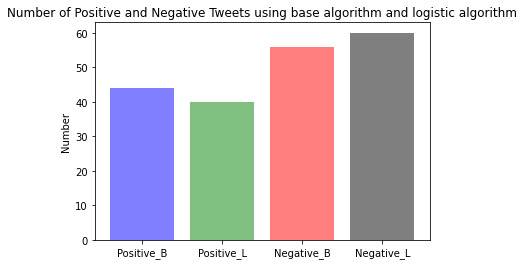

In [42]:
objects = ['Positive_B','Positive_L','Negative_B','Negative_L']
y_pos = np.arange(len(objects))
plt.ylabel('Number')
plt.title('Number of Positive and Negative Tweets using base algorithm and logistic algorithm')

plt.bar(y_pos,[total_posB,total_posL,total_negB,total_negL],alpha=0.5,color=['blue','green','red','black'])
plt.xticks(y_pos,objects)

plt.show()

## Visualisation en utilison le pie chart

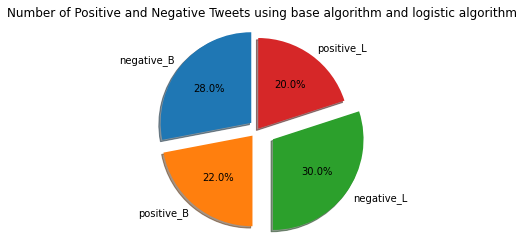

In [44]:
labels = 'negative_B', 'positive_B', 'negative_L', 'positive_L'
sizes = [total_negB, total_posB, total_negL, total_posL]
explode = (0.1, 0.1, 0.2, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Number of Positive and Negative Tweets using base algorithm and logistic algorithm')
plt.show()